# [作業目標]
- 請同學試著使用 pandas.corr() 這個函數來顯示相關係數並加以觀察結果 
- 思考1 : 使用 pandas 有沒有什麼寫法, 可以顯示欄位中最大的幾筆, 以及最小幾筆呢? (Hint: 排序後列出前幾筆/後幾筆)
- 思考2 : 試著使用散佈圖, 顯示相關度最大/最小的特徵與目標值的關係, 如果圖形不明顯, 是否有調整的方法?

# [作業重點]
- 綜合前幾單元的作法, 試試看是否能夠用繪圖顯示出特徵與目標的相關性

In [1]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = '../data/'

In [2]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [3]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

### 相關係數
一樣，pandas 很貼心地讓我們可以非常容易計算相關係數

In [5]:
# 觀察相關係數
app_train.corr()['TARGET']

SK_ID_CURR                    -0.002108
TARGET                         1.000000
NAME_CONTRACT_TYPE            -0.030896
FLAG_OWN_CAR                  -0.021851
FLAG_OWN_REALTY               -0.006148
CNT_CHILDREN                   0.019187
AMT_INCOME_TOTAL              -0.003982
AMT_CREDIT                    -0.030369
AMT_ANNUITY                   -0.012817
AMT_GOODS_PRICE               -0.039645
REGION_POPULATION_RELATIVE    -0.037227
DAYS_BIRTH                    -0.078239
DAYS_EMPLOYED                  0.074958
DAYS_REGISTRATION              0.041975
DAYS_ID_PUBLISH                0.051457
OWN_CAR_AGE                    0.037612
FLAG_MOBIL                     0.000534
FLAG_EMP_PHONE                 0.045982
FLAG_WORK_PHONE                0.028524
FLAG_CONT_MOBILE               0.000370
FLAG_PHONE                    -0.023806
FLAG_EMAIL                    -0.001758
CNT_FAM_MEMBERS                0.009308
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893


## 練習時間
列出目標 (TARGET) 與所有欄位之間相關係數，數值最大以及最小各 15 個

通過相關係數的結果觀察有興趣的欄位與 TARGET 或其他欄位的相關係數，並嘗試找出有趣的訊息
- 最好的方式當然是畫圖，舉例來說，我們知道  EXT_SOURCE_3 這個欄位和 TARGET 之間的相關係數是 -0.178919 (在已經這個資料集已經是最負的了！)，那我們可以 EXT_SOURCE_3  為 x 軸， TARGET 為 y 軸，把資料給畫出來

In [7]:
target_corrs = app_train.corr()['TARGET']

type(target_corrs)

pandas.core.series.Series

In [8]:
# 負相關
nagtive_corr = target_corrs.sort_values(ascending=True).iloc[0:15]
nagtive_corr

EXT_SOURCE_3                 -0.178919
EXT_SOURCE_2                 -0.160472
EXT_SOURCE_1                 -0.155317
DAYS_BIRTH                   -0.078239
DAYS_EMPLOYED_ANOM           -0.045987
FLOORSMAX_AVG                -0.044003
FLOORSMAX_MEDI               -0.043768
FLOORSMAX_MODE               -0.043226
AMT_GOODS_PRICE              -0.039645
REGION_POPULATION_RELATIVE   -0.037227
ELEVATORS_AVG                -0.034199
ELEVATORS_MEDI               -0.033863
FLOORSMIN_AVG                -0.033614
FLOORSMIN_MEDI               -0.033394
LIVINGAREA_AVG               -0.032997
Name: TARGET, dtype: float64

In [9]:
# 正相關
positive_corr = target_corrs.sort_values(ascending=False).iloc[0:15]
positive_corr

TARGET                         1.000000
DAYS_EMPLOYED                  0.074958
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
DAYS_REGISTRATION              0.041975
OWN_CAR_AGE                    0.037612
LIVE_CITY_NOT_WORK_CITY        0.032518
DEF_30_CNT_SOCIAL_CIRCLE       0.032248
DEF_60_CNT_SOCIAL_CIRCLE       0.031276
Name: TARGET, dtype: float64

In [11]:
grp = ['TARGET']
grouped_df = app_train.groupby(grp)['EXT_SOURCE_3']
grouped_df.mean()


TARGET
0    0.520969
1    0.390717
Name: EXT_SOURCE_3, dtype: float64

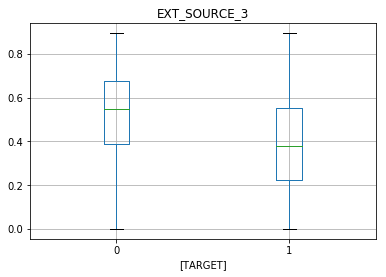

In [12]:
plt_column =['EXT_SOURCE_3']
plt_by = [ 'TARGET']
app_train.boxplot(column=plt_column, by = plt_by, showfliers = False)
plt.suptitle('')
plt.show()

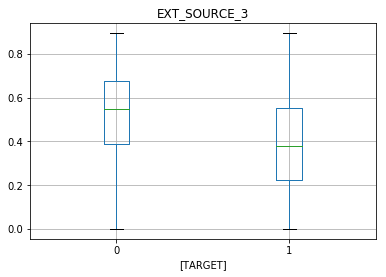

TARGET
0    0.520969
1    0.390717
Name: EXT_SOURCE_3, dtype: float64
Correlation: -0.1789


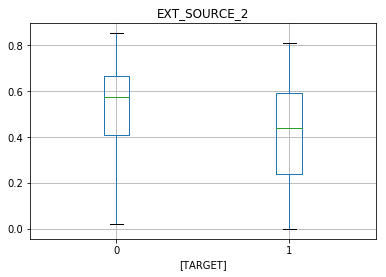

TARGET
0    0.523479
1    0.410935
Name: EXT_SOURCE_2, dtype: float64
Correlation: -0.1605


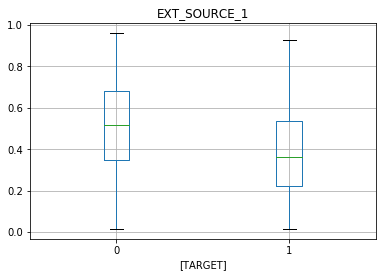

TARGET
0    0.511461
1    0.386968
Name: EXT_SOURCE_1, dtype: float64
Correlation: -0.1553


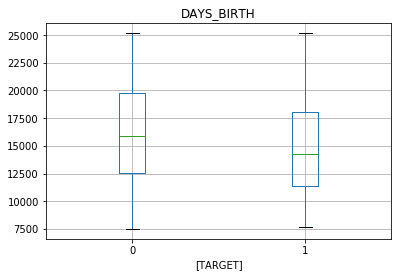

TARGET
0    16138.176397
1    14884.828077
Name: DAYS_BIRTH, dtype: float64
Correlation: -0.0782


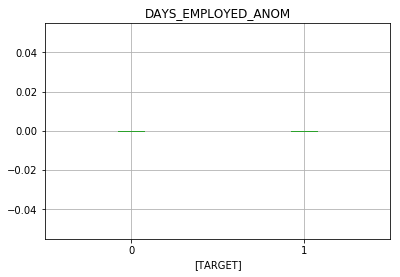

TARGET
0    0.185308
1    0.120443
Name: DAYS_EMPLOYED_ANOM, dtype: float64
Correlation: -0.0460


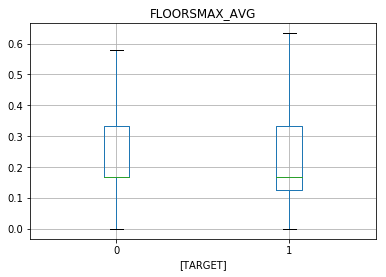

TARGET
0    0.228023
1    0.203021
Name: FLOORSMAX_AVG, dtype: float64
Correlation: -0.0440


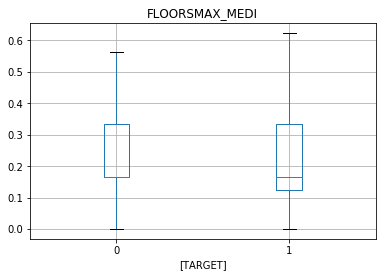

TARGET
0    0.227634
1    0.202692
Name: FLOORSMAX_MEDI, dtype: float64
Correlation: -0.0438


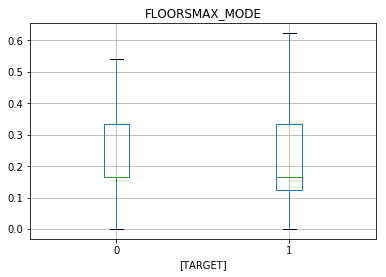

TARGET
0    0.224015
1    0.199612
Name: FLOORSMAX_MODE, dtype: float64
Correlation: -0.0432


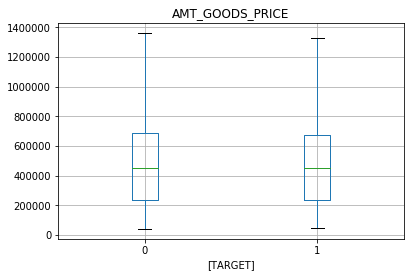

TARGET
0    542736.795003
1    488972.412554
Name: AMT_GOODS_PRICE, dtype: float64
Correlation: -0.0396


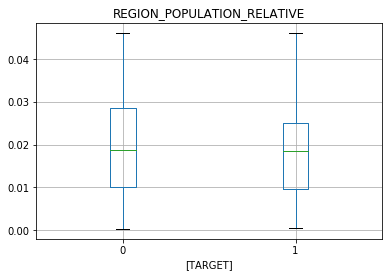

TARGET
0    0.021021
1    0.019131
Name: REGION_POPULATION_RELATIVE, dtype: float64
Correlation: -0.0372


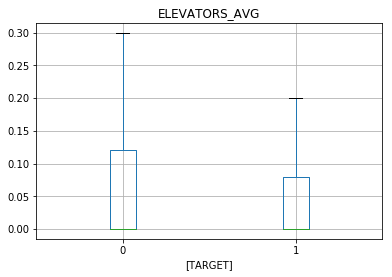

TARGET
0    0.080194
1    0.062036
Name: ELEVATORS_AVG, dtype: float64
Correlation: -0.0342


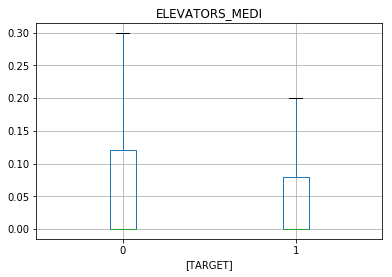

TARGET
0    0.079317
1    0.061352
Name: ELEVATORS_MEDI, dtype: float64
Correlation: -0.0339


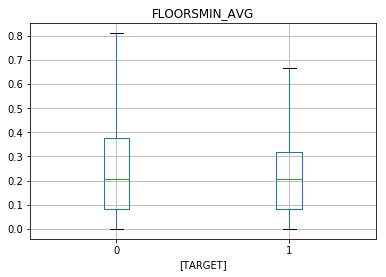

TARGET
0    0.23337
1    0.21196
Name: FLOORSMIN_AVG, dtype: float64
Correlation: -0.0336


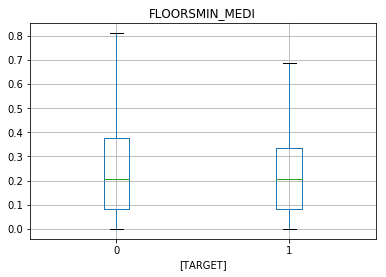

TARGET
0    0.233097
1    0.211754
Name: FLOORSMIN_MEDI, dtype: float64
Correlation: -0.0334


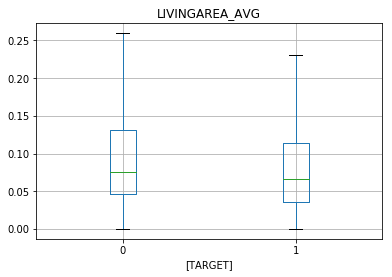

TARGET
0    0.108400
1    0.094096
Name: LIVINGAREA_AVG, dtype: float64
Correlation: -0.0330


In [13]:
# # 負相關 檢視這些欄位的數值範圍

for col, corr_value in nagtive_corr.iteritems():
    grouped_df = app_train.groupby(grp)[col]
    plt_column =[col]
    app_train.boxplot(column=plt_column, by = grp, showfliers = False)
    plt.suptitle('')
    plt.show()
    print(grouped_df.mean())
    print("Correlation: %.4f" % (corr_value))
    

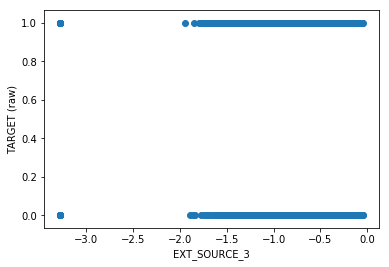

[[ 1.        -0.1789187]
 [-0.1789187  1.       ]]


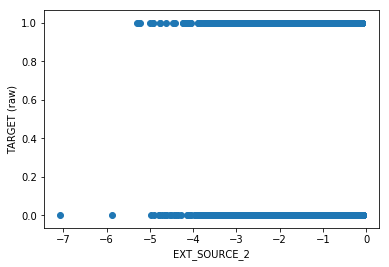

[[ 1.         -0.16047167]
 [-0.16047167  1.        ]]


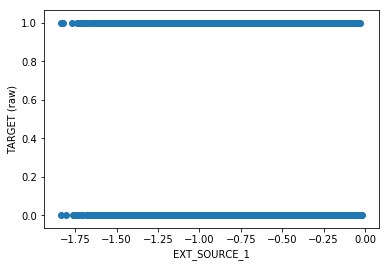

[[ 1.         -0.15531713]
 [-0.15531713  1.        ]]


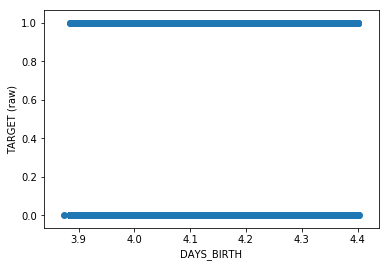

[[ 1.         -0.07823931]
 [-0.07823931  1.        ]]


/home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


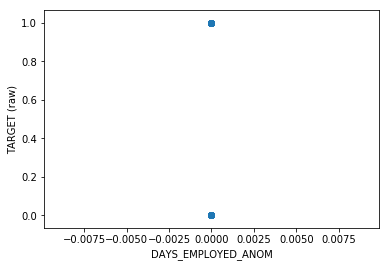

[[ 1.         -0.04598708]
 [-0.04598708  1.        ]]


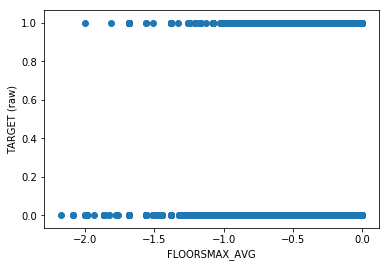

[[ 1.         -0.04400337]
 [-0.04400337  1.        ]]


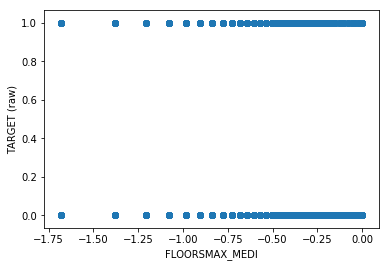

[[ 1.         -0.04376792]
 [-0.04376792  1.        ]]


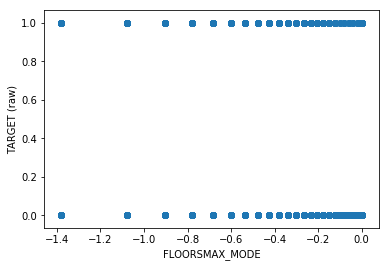

[[ 1.         -0.04322626]
 [-0.04322626  1.        ]]


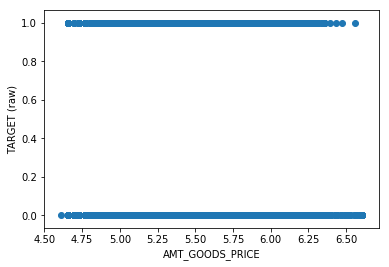

[[ 1.         -0.03964528]
 [-0.03964528  1.        ]]


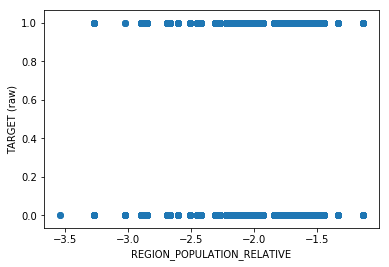

[[ 1.         -0.03722715]
 [-0.03722715  1.        ]]


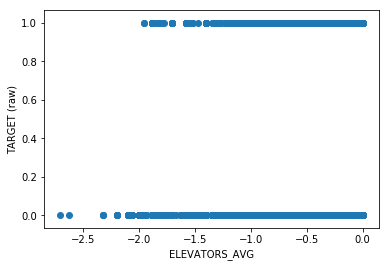

[[ 1.         -0.03419879]
 [-0.03419879  1.        ]]


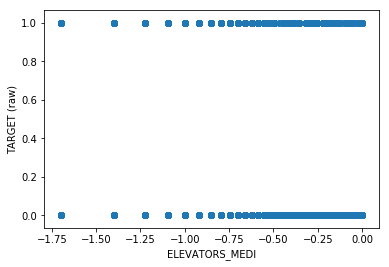

[[ 1.         -0.03386288]
 [-0.03386288  1.        ]]


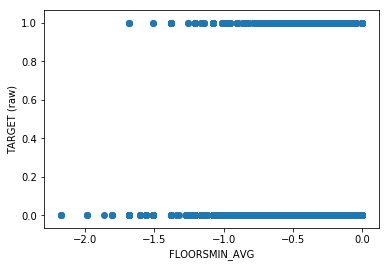

[[ 1.        -0.0336135]
 [-0.0336135  1.       ]]


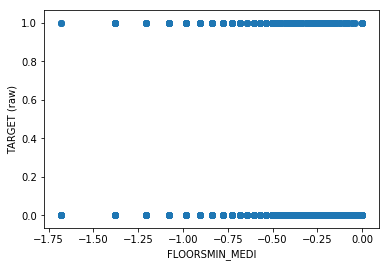

[[ 1.         -0.03339429]
 [-0.03339429  1.        ]]


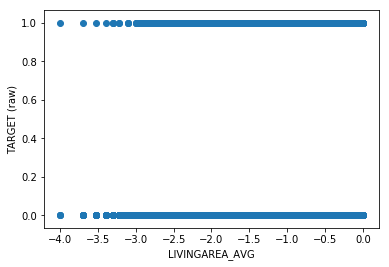

[[ 1.         -0.03299712]
 [-0.03299712  1.        ]]


In [15]:
# # 負相關 檢視這些欄位的數值範圍
for col, corr_value in nagtive_corr.iteritems():
    #plt.plot(app_train[col], app_train['TARGET'], '.')
    # 再看看正相關的 x,y 分布
    sub = app_train[~app_train[col].isnull()]
    plt.scatter(np.log10(sub[col]), sub['TARGET'])
    plt.xlabel(col)
    plt.ylabel('TARGET (raw)')
    plt.show()
    corr = np.corrcoef(sub[col], sub['TARGET'])
    print(corr)

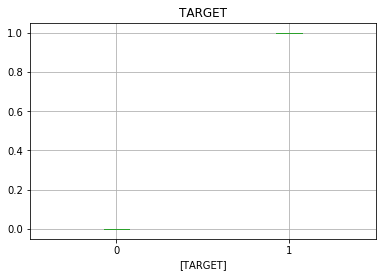

TARGET
0    0
1    1
Name: TARGET, dtype: int64
Correlation: 1.0000


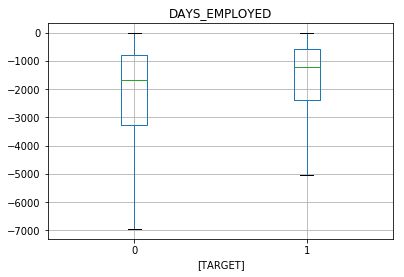

TARGET
0   -2438.140133
1   -1814.918800
Name: DAYS_EMPLOYED, dtype: float64
Correlation: 0.0750


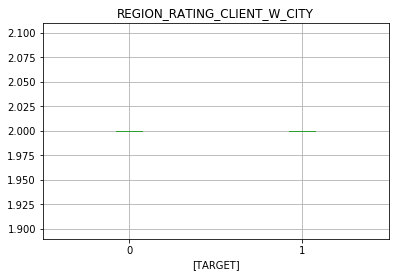

TARGET
0    2.022449
1    2.134824
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64
Correlation: 0.0609


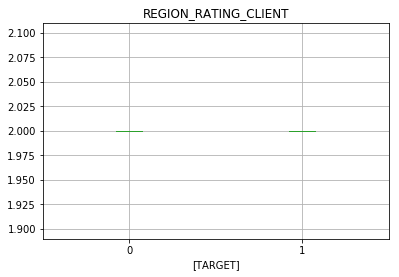

TARGET
0    2.043578
1    2.153635
Name: REGION_RATING_CLIENT, dtype: float64
Correlation: 0.0589


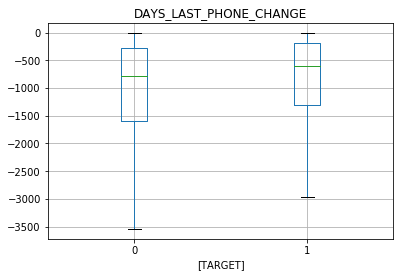

TARGET
0   -976.388294
1   -808.796818
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64
Correlation: 0.0552


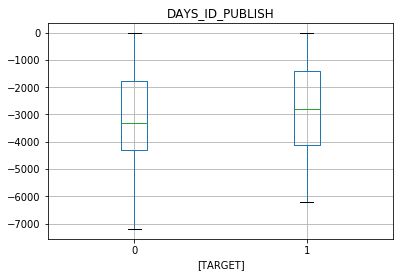

TARGET
0   -3017.219788
1   -2732.099617
Name: DAYS_ID_PUBLISH, dtype: float64
Correlation: 0.0515


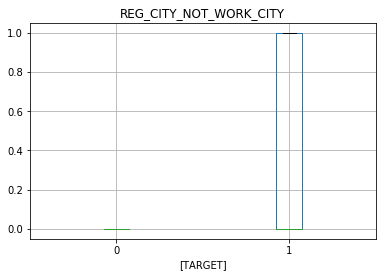

TARGET
0    0.22409
1    0.30292
Name: REG_CITY_NOT_WORK_CITY, dtype: float64
Correlation: 0.0510


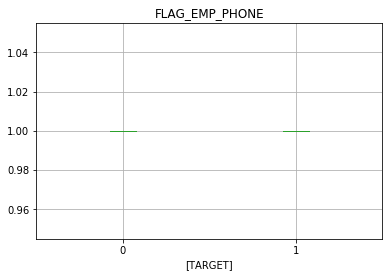

TARGET
0    0.814653
1    0.879517
Name: FLAG_EMP_PHONE, dtype: float64
Correlation: 0.0460


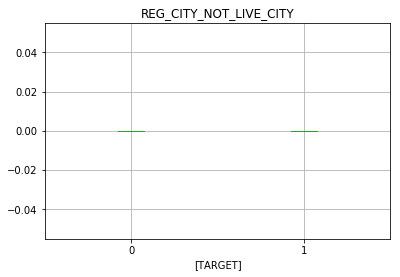

TARGET
0    0.074641
1    0.118389
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64
Correlation: 0.0444


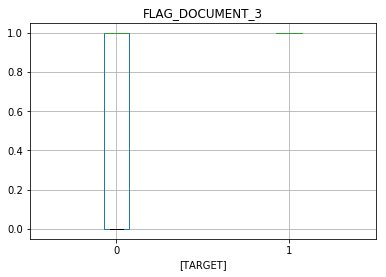

TARGET
0    0.704060
1    0.777925
Name: FLAG_DOCUMENT_3, dtype: float64
Correlation: 0.0443


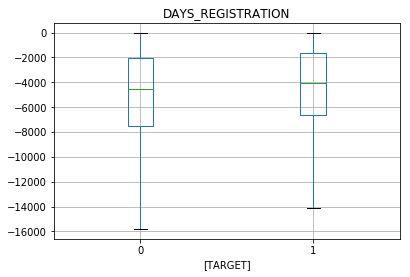

TARGET
0   -5029.941065
1   -4487.127009
Name: DAYS_REGISTRATION, dtype: float64
Correlation: 0.0420


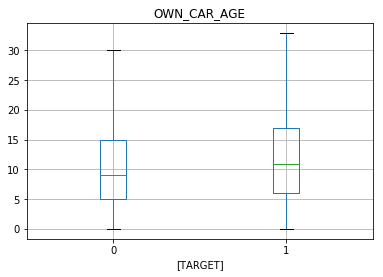

TARGET
0    11.935540
1    13.668691
Name: OWN_CAR_AGE, dtype: float64
Correlation: 0.0376


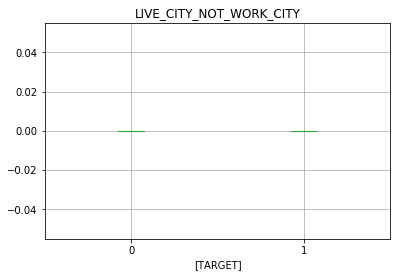

TARGET
0    0.175856
1    0.221672
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64
Correlation: 0.0325


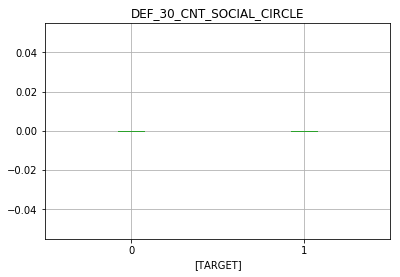

TARGET
0    0.139148
1    0.191980
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64
Correlation: 0.0322


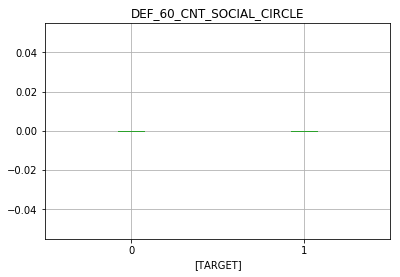

TARGET
0    0.096688
1    0.138247
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64
Correlation: 0.0313


In [16]:
# # 正相關 檢視這些欄位的數值範圍
for col, corr_value in positive_corr.iteritems():
    grouped_df = app_train.groupby(grp)[col]
    plt_column =[col]
    app_train.boxplot(column=plt_column, by = grp, showfliers = False)
    plt.suptitle('')
    plt.show()
    print(grouped_df.mean())
    print("Correlation: %.4f" % (corr_value))





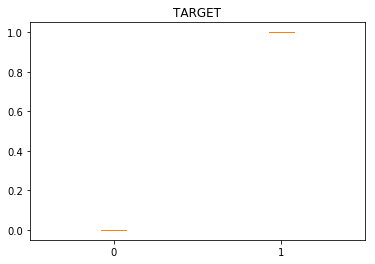

Correlation: 1.0000


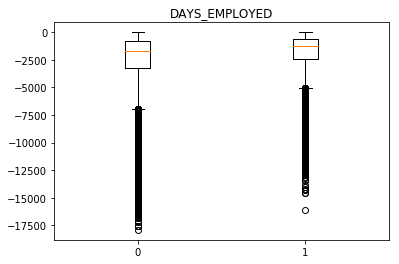

Correlation: 0.0750


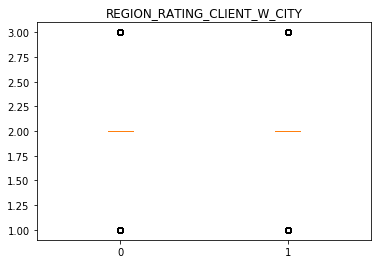

Correlation: 0.0609


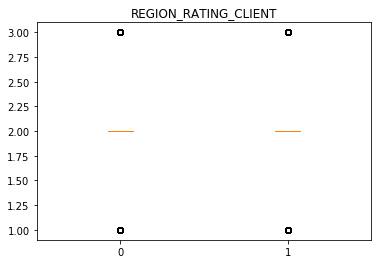

Correlation: 0.0589


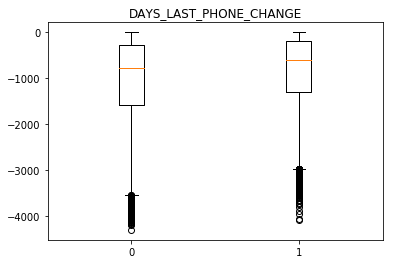

Correlation: 0.0552


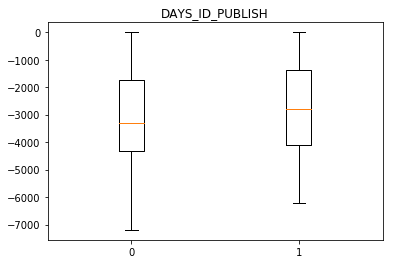

Correlation: 0.0515


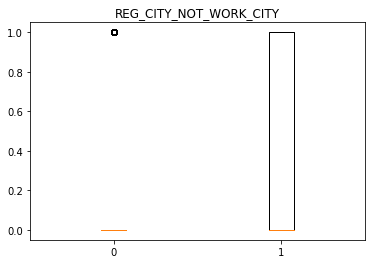

Correlation: 0.0510


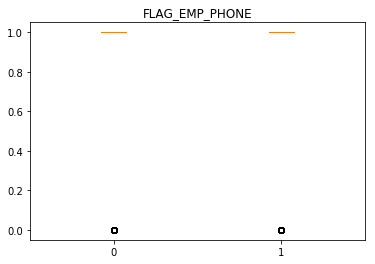

Correlation: 0.0460


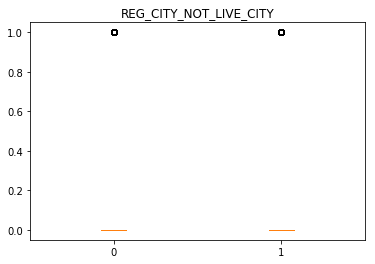

Correlation: 0.0444


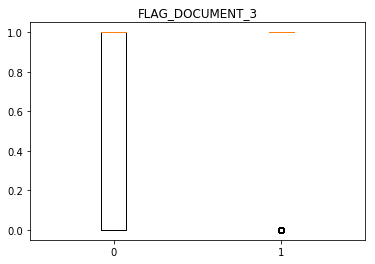

Correlation: 0.0443


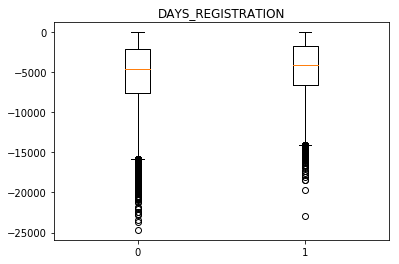

Correlation: 0.0420


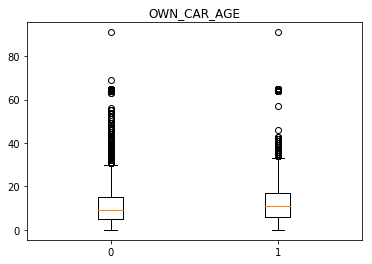

Correlation: 0.0376


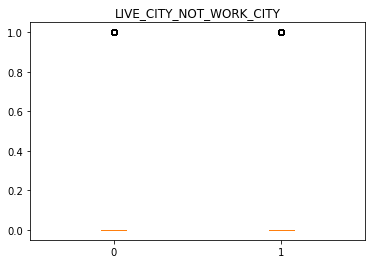

Correlation: 0.0325


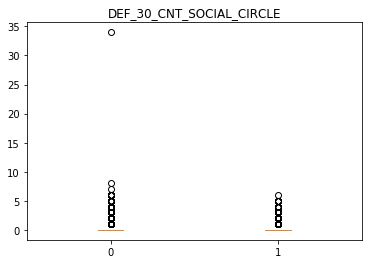

Correlation: 0.0322


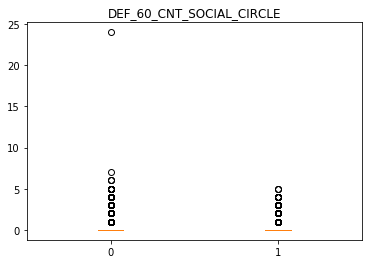

Correlation: 0.0313


In [11]:
# # 正相關 檢視這些欄位的數值範圍
for col, corr_value in positive_corr.iteritems():
    sub = app_train[~app_train[col].isnull()]
    target0_df = sub[sub['TARGET'] == 0]
    target1_df = sub[sub['TARGET'] == 1]
    data = [target0_df[col], target1_df[col]]
    plt.boxplot(data, labels=('0', '1'))
    plt.title(col)
    #app_train.boxplot(col)
    plt.show()
    corr = np.corrcoef(sub[col] , sub['TARGET'])
    print("Correlation: %.4f" % (corr[0][1]))
    
    

/home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.


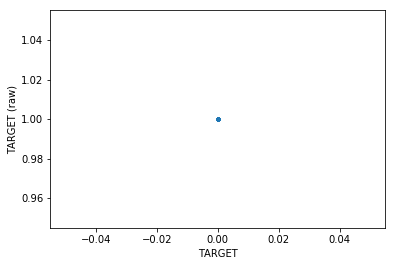

Correlation: 1.0000


/home/one/anaconda3/envs/my_env/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in log10
  after removing the cwd from sys.path.


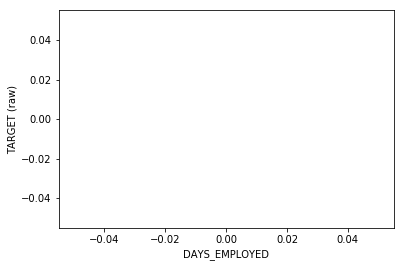

Correlation: 0.0750


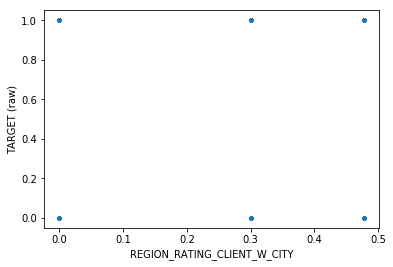

Correlation: 0.0609


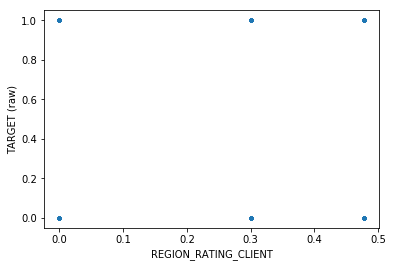

Correlation: 0.0589


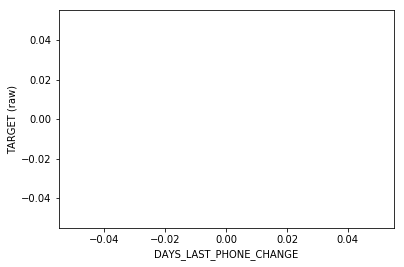

Correlation: 0.0552


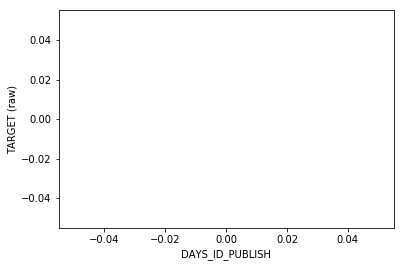

Correlation: 0.0515


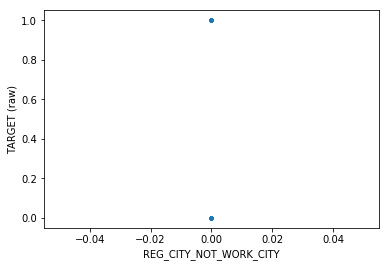

Correlation: 0.0510


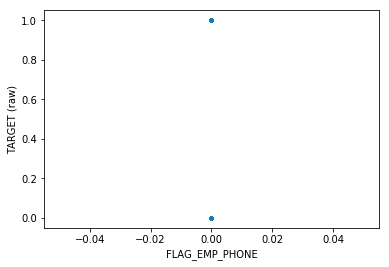

Correlation: 0.0460


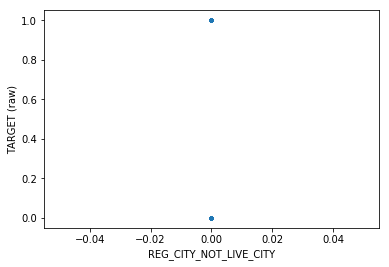

Correlation: 0.0444


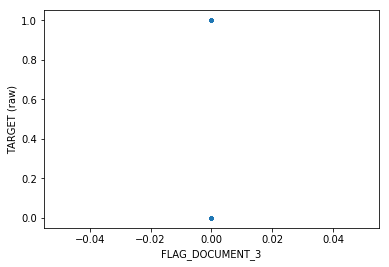

Correlation: 0.0443


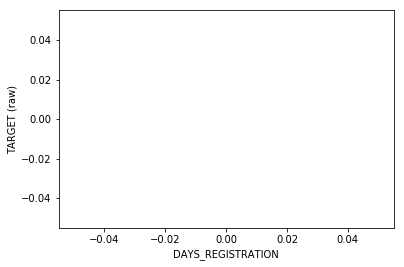

Correlation: 0.0420


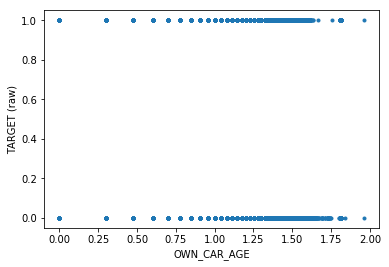

Correlation: 0.0376


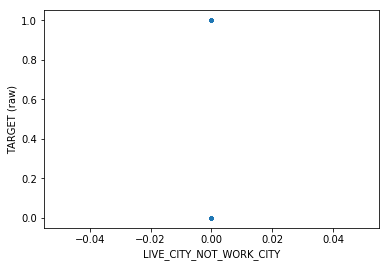

Correlation: 0.0325


In [ ]:
# # 正相關 檢視這些欄位的數值範圍
for col, corr_value in positive_corr.iteritems():
    sub = app_train[~app_train[col].isnull()]
    plt.plot(np.log10(sub[col]), sub['TARGET'], '.')
    plt.xlabel(col)
    plt.ylabel('TARGET (raw)')
    plt.show()
    corr = np.corrcoef(sub[col], sub['TARGET'])
    print("Correlation: %.4f" % (corr[0][1]))